# Importing Libaries

In [ ]:
#For Avoding the warning
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
#Upload file into google colab session
from google.colab import drive
#Multidimensional array objects and a collection of routines for processing those arrays
import numpy as np
#For data analysis and data manipulation
import pandas as pd
#For 2D Graph
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
#For 3D Graph
import seaborn as sns
import plotly.express as px
from scipy import stats
#Import label encoder 
from sklearn import preprocessing 
#Spliting the data into train and test using sklearn library
from sklearn.model_selection import train_test_split 
#Feature scaling using the sklearn library
from sklearn.preprocessing import StandardScaler
#Sklearn for SVC
from sklearn.svm import SVC
#Using metrics for confusion matrix, getting the accuracy score
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score,roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score
#Using k fold cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score,recall_score
from itertools import cycle

# Reading File

In [ ]:
#Mount the Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#To get the path
%cd /content/drive/My Drive/Colab Notebooks/ML Final Project/

/content/drive/My Drive/Colab Notebooks/ML Final Project


In [ ]:
#Extracting the Files
!ls

'Amazon Data.csv'


In [ ]:
#Reading the CSV File
Amazon_data = pd.read_csv('Amazon Data.csv')
#Printing the top 5 rows from dataframe
Amazon_data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


# Data Preprocessing

In [ ]:
#How many rows and columns 
Amazon_data.shape

(550, 7)

In [ ]:
#Getting info of each feature
Amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [ ]:
#Displaying summary statistics 
Amazon_data.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [ ]:
#Checking the null values
Amazon_data.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [ ]:
#Getting Author Names
Amazon_data['Author'].unique()

array(['JJ Smith', 'Stephen King', 'Jordan B. Peterson', 'George Orwell',
       'National Geographic Kids', 'George R. R. Martin', 'Amor Towles',
       'James Comey', 'Fredrik Backman', 'Larry Schweikart',
       'Jaycee Dugard', "Madeleine L'Engle", 'Steve Harvey',
       'Adult Coloring Book Designs', 'Blue Star Coloring',
       'Coloring Books for Adults', 'Ron Chernow', 'Anthony Doerr',
       'Veronica Roth', 'Chris Kyle', 'Khaled Hosseini', 'Glenn Beck',
       'Neil deGrasse Tyson', 'Mark Twain', 'DK', 'Angie Grace',
       'Ina Garten', 'Michelle Obama', 'Atul Gawande', 'Ta-Nehisi Coates',
       'Bruce Springsteen', 'Stephenie Meyer', 'Bill Martin Jr.',
       'Jeff Kinney', "Sasha O'Hara", 'David Goggins', 'Thomas Piketty',
       'Suzanne Collins', 'Chrissy Teigen', 'Francis Chan', 'Kevin Kwan',
       'Marjorie Sarnat', 'Abraham Verghese', 'Brené Brown',
       'Malcolm Gladwell', 'Charlaine Harris', 'Rod Campbell',
       'George W. Bush', 'Tony Hsieh', 'American Psychi

In [ ]:
#Getting the top 10 Name and Genre
Genre_df = Amazon_data[['Name','Genre']]
Genre_df.head(10)

,Name,Genre
0,10-Day Green Smoothie Cleanse,Non Fiction
1,11/22/63: A Novel,Fiction
2,12 Rules for Life: An Antidote to Chaos,Non Fiction
3,1984 (Signet Classics),Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,Fiction
7,A Gentleman in Moscow: A Novel,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",Non Fiction
9,A Man Called Ove: A Novel,Fiction


In [ ]:
#Accessing the information of first row of the data using loc method ---
Amazon_data.loc[0]

Name           10-Day Green Smoothie Cleanse
Author                              JJ Smith
User Rating                              4.7
Reviews                                17350
Price                                      8
Year                                    2016
Genre                            Non Fiction
Name: 0, dtype: object

In [ ]:
# Incorrectly Formatted Author Names
Amazon_data["Author"] = Amazon_data["Author"].replace(
    ["J. K. Rowling", "George R. R. Martin","R. J. Palacio","E L James", "JJ Smith"],
    ["J.K. Rowling", "George R.R. Martin","R.J. Palacio", "E.L. James", "J.J. Smith"])

In [ ]:
#Checking the changex
Amazon_data.loc[Amazon_data['Author']=='George R. R. Martin']

,Name,Author,User Rating,Reviews,Price,Year,Genre


In [ ]:
# Incomplete or Improperly Capitalized Book Titles
Amazon_data["Name"] = Amazon_data["Name"].replace(
    "JOURNEY TO THE ICE P",
    "Journey to the Ice Palace (Disney Frozen: Jumbo Coloring Book)")

Amazon_data["Name"] = Amazon_data["Name"].replace(
    "The 5 Love Languages: The Secret to Love That Lasts",
    "The 5 Love Languages: The Secret to Love that Lasts")

In [ ]:
Amazon_data.loc[(Amazon_data['Name']=='Eclipse (Twilight Sagas)')|(Amazon_data['Name']=='Eclipse (Twilight)')]

,Name,Author,User Rating,Reviews,Price,Year,Genre
95,Eclipse (Twilight Sagas),Stephenie Meyer,4.7,5505,7,2009,Fiction
96,Eclipse (Twilight),Stephenie Meyer,4.7,5505,18,2009,Fiction


In [ ]:
#Prices was zero
price = list(Amazon_data.Price.unique())
print(price)
sorted(price)

[8, 22, 15, 6, 12, 11, 30, 3, 2, 32, 5, 17, 4, 13, 14, 9, 24, 21, 18, 0, 28, 16, 10, 105, 20, 1, 7, 19, 54, 52, 25, 27, 46, 39, 53, 40, 36, 82, 23, 42]


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 27,
 28,
 30,
 32,
 36,
 39,
 40,
 42,
 46,
 52,
 53,
 54,
 82,
 105]

In [ ]:
Amazon_data.loc[Amazon_data['Price']==0]

,Name,Author,User Rating,Reviews,Price,Year,Genre
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
116,Frozen (Little Golden Book),RH Disney,4.7,3642,0,2014,Fiction
193,Journey to the Ice Palace (Disney Frozen: Jumb...,RH Disney,4.6,978,0,2014,Fiction
219,Little Blue Truck,Alice Schertle,4.9,1884,0,2014,Fiction
358,The Constitution of the United States,Delegates of the Constitutional,4.8,2774,0,2016,Non Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction
461,The Short Second Life of Bree Tanner: An Eclip...,Stephenie Meyer,4.6,2122,0,2010,Fiction
505,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2013,Fiction
506,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2014,Fiction


In [ ]:
sample_drop0price=Amazon_data[(Amazon_data['Price']!=0)]
sample_drop0price.loc[sample_drop0price['Price']==0]

,Name,Author,User Rating,Reviews,Price,Year,Genre


# EDA

1. Count of Genre Column

In [ ]:
#Grouping the type of Genre and taking the count
df1 = pd.DataFrame(Amazon_data.groupby(by = ['Genre']).size().reset_index(name = 'count'))
#Getting count of Genre
fig = px.pie(df1, values="count" , names ="Genre",color_discrete_sequence = px.colors.sequential.RdBu, template = "plotly_dark")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',title = 'Count of Genre')
fig.show()

2. Distribution of genres across all years

In [ ]:
# Genre distribution across all years 2D density heatmap with number labels
fig = px.density_heatmap(Amazon_data, x="Year", y="Genre", nbinsx=11, text_auto=True)
fig.update_layout(title=dict(text="Distribution of Genres across All Years"))
fig.update_layout(xaxis={'side': 'top'})
fig.update_layout(xaxis=dict(tickmode="linear",tick0=0,dtick=1))
fig.update_layout(margin=dict(t=120))
fig.update_traces(textfont_size=14)
fig.show()

3.Which Authors have appeared in the bestselling list more frequently

<ipython-input-22-b254093c90db>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



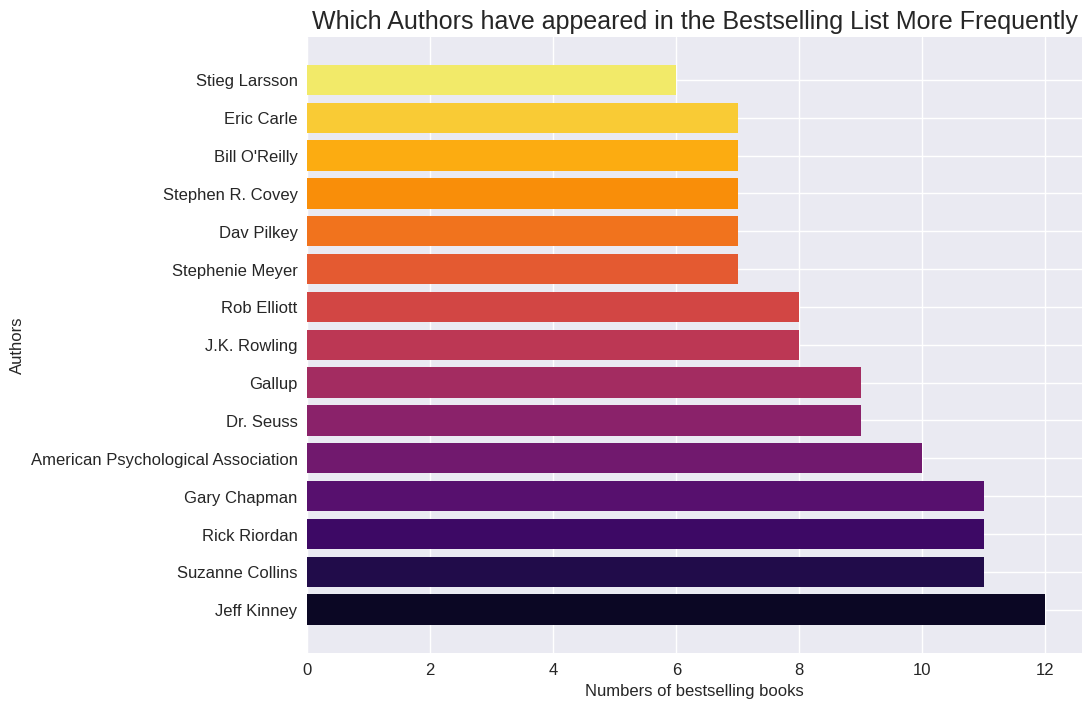

In [ ]:
num_books_written = Amazon_data.groupby('Author')[['Name']].count().sort_values('Name', ascending=False).head(15).reset_index()
plt.style.use("seaborn")
palette = sns.color_palette("inferno", 15)
plt.figure(figsize=(10,8))
plt.barh(y=num_books_written['Author'],width=num_books_written['Name'], color=palette)
plt.xlabel('Numbers of bestselling books', fontsize=12)
plt.ylabel('Authors', fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.title('Which Authors have appeared in the Bestselling List More Frequently',fontsize=18)
#plt.grid()
plt.show()

<ipython-input-23-e6172c384946>:3: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



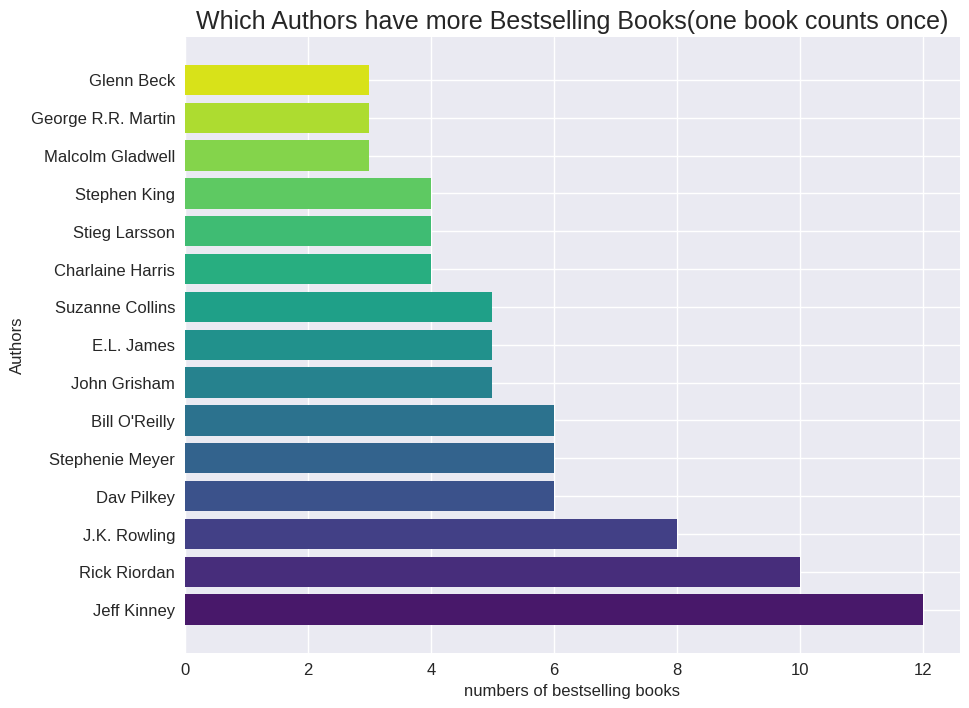

In [ ]:
sample1=Amazon_data[(Amazon_data['Name']!='Eclipse (Twilight)')]
sample1=sample1.drop_duplicates(subset='Name',keep='first',inplace=False)
plt.style.use("seaborn")
palette = sns.color_palette("viridis",15)
num_books= sample1.groupby('Author')[['Name']].count().sort_values('Name', ascending=False).head(15).reset_index()
plt.figure(figsize=(10,8))
plt.barh(y=num_books['Author'],width=num_books['Name'], color=palette)
plt.xlabel('numbers of bestselling books', fontsize=12)
plt.ylabel('Authors', fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.title('Which Authors have more Bestselling Books(one book counts once)',fontsize=18)
plt.show()

In [ ]:
sample1.loc[(sample1['Author']=='Jeff Kinney')] 

,Name,Author,User Rating,Reviews,Price,Year,Genre
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
72,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15,2009,Fiction
73,Diary of a Wimpy Kid: The Long Haul,Jeff Kinney,4.8,6540,22,2014,Fiction
80,"Dog Days (Diary of a Wimpy Kid, Book 4) (Volum...",Jeff Kinney,4.8,3181,12,2009,Fiction
88,Double Down (Diary of a Wimpy Kid #11),Jeff Kinney,4.8,5118,20,2016,Fiction
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction
435,The Meltdown (Diary of a Wimpy Kid Book 13),Jeff Kinney,4.8,5898,8,2018,Fiction
468,"The Third Wheel (Diary of a Wimpy Kid, Book 7)",Jeff Kinney,4.7,6377,7,2012,Fiction


Jeff Kinney appeared in the list most often. And each time, he showed up due to a different book.

4.Which Authors have received the highest ratings in average

In [ ]:
mean_rating_author = Amazon_data.groupby('Author')[['User Rating']].mean().sort_values('User Rating', ascending=False).head(10).reset_index()
mean_rating_author.head(10)

,Author,User Rating
0,Nathan W. Pyle,4.9
1,Sherri Duskey Rinker,4.9
2,Jill Twiss,4.9
3,Rush Limbaugh,4.9
4,Pete Souza,4.9
5,Sarah Young,4.9
6,Patrick Thorpe,4.9
7,Bill Martin Jr.,4.9
8,Dav Pilkey,4.9
9,Alice Schertle,4.9


In [ ]:
Amazon_data.loc[(Amazon_data['Author']=='Nathan W. Pyle') | (Amazon_data['Author']=='Sherri Duskey Rinker')| (Amazon_data['Author']=='Jill Twiss')]

,Name,Author,User Rating,Reviews,Price,Year,Genre
146,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,4.9,7038,7,2012,Fiction
147,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,4.9,7038,7,2013,Fiction
207,Last Week Tonight with John Oliver Presents A ...,Jill Twiss,4.9,11881,13,2018,Fiction
303,Strange Planet (Strange Planet Series),Nathan W. Pyle,4.9,9382,6,2019,Fiction


We can see the highest 14 mean ratings are all equal to 4.90----Mostly because the author was in the list due to the same bestselling book.

5. What are the annual mean prices like?

In [ ]:
sample_drop0price=Amazon_data[(Amazon_data['Price']!=0)]
meanprice_year = sample_drop0price.groupby('Year')[['Price']].mean().sort_values('Price', ascending=False).head(15)
meanprice_year = meanprice_year.sort_values('Year',ascending=True)
print('Overall mean price is')
print(meanprice_year['Price'].mean())
meanprice_year.head(15)

Overall mean price is
13.41442788577882


,Price
Year,
2009,15.400000
2010,13.755102
2011,15.408163
2012,15.300000
2013,15.208333
2014,15.913043
2015,10.632653
2016,13.729167
2017,11.612245


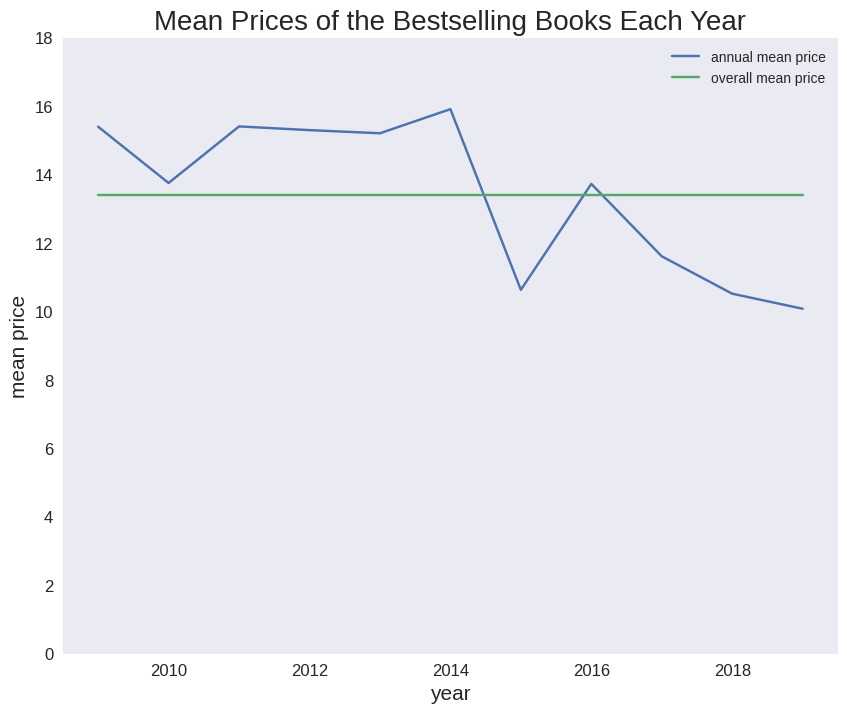

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(meanprice_year,label='annual mean price')
x=np.linspace(2009,2019,11)
y=x*0+meanprice_year['Price'].mean()
plt.plot(x,y,label='overall mean price')
plt.ylim(0,18)
plt.xlabel('year', fontsize=15)
plt.ylabel('mean price', fontsize=15)
plt.tick_params(axis='both', labelsize=12)
plt.title('Mean Prices of the Bestselling Books Each Year',fontsize=20)
plt.legend()
plt.grid()
plt.show()

Though fluctuating, the annual mean prices did not wave dramatically. Also, we can observe the overall trending is going down, implying the prices of bestselling books are decreasing in recent years.

6.What are the top 10 most expensive bestselling books?



<ipython-input-29-2902670e631e>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



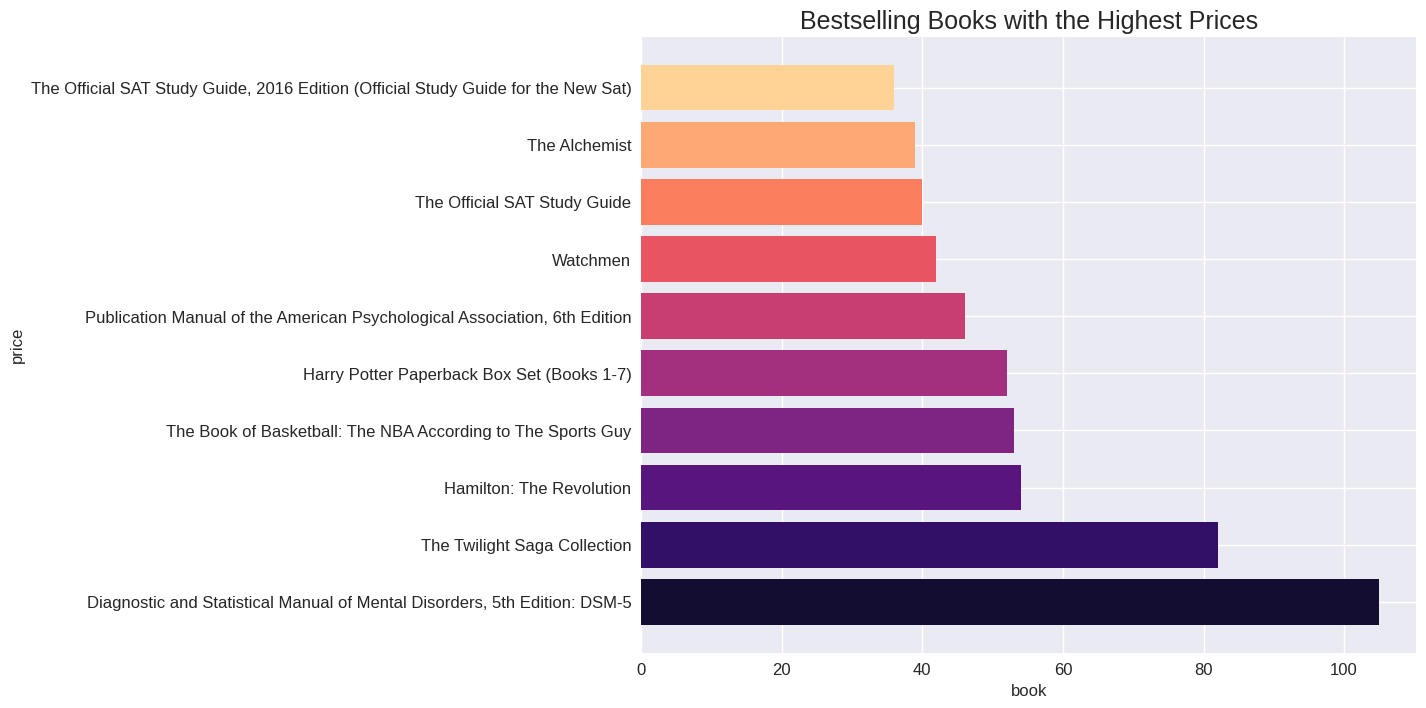

In [ ]:
meanprice_book = Amazon_data.groupby('Name')[['Price']].mean().sort_values('Price', ascending=False).head(10).reset_index()
plt.style.use("seaborn")
palette = sns.color_palette("magma",10)
plt.figure(figsize=(10,8))
plt.barh(y=meanprice_book['Name'],width=meanprice_book['Price'],color=palette)
plt.xlabel('book', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.title('Bestselling Books with the Highest Prices',fontsize=18)
plt.show()

7. What are the annual mean ratings like?

In [ ]:
mean_rating_year = Amazon_data.groupby('Year')[['User Rating']].mean().sort_values('User Rating', ascending=False).head(11)
mean_rating_year = mean_rating_year.sort_values('Year',ascending=True)
print('Overall mean rating is')
print(mean_rating_year['User Rating'].mean())
mean_rating_year.head(15)

Overall mean rating is
4.618363636363636


,User Rating
Year,
2009,4.584
2010,4.558
2011,4.558
2012,4.532
2013,4.554
2014,4.622
2015,4.648
2016,4.678
2017,4.660


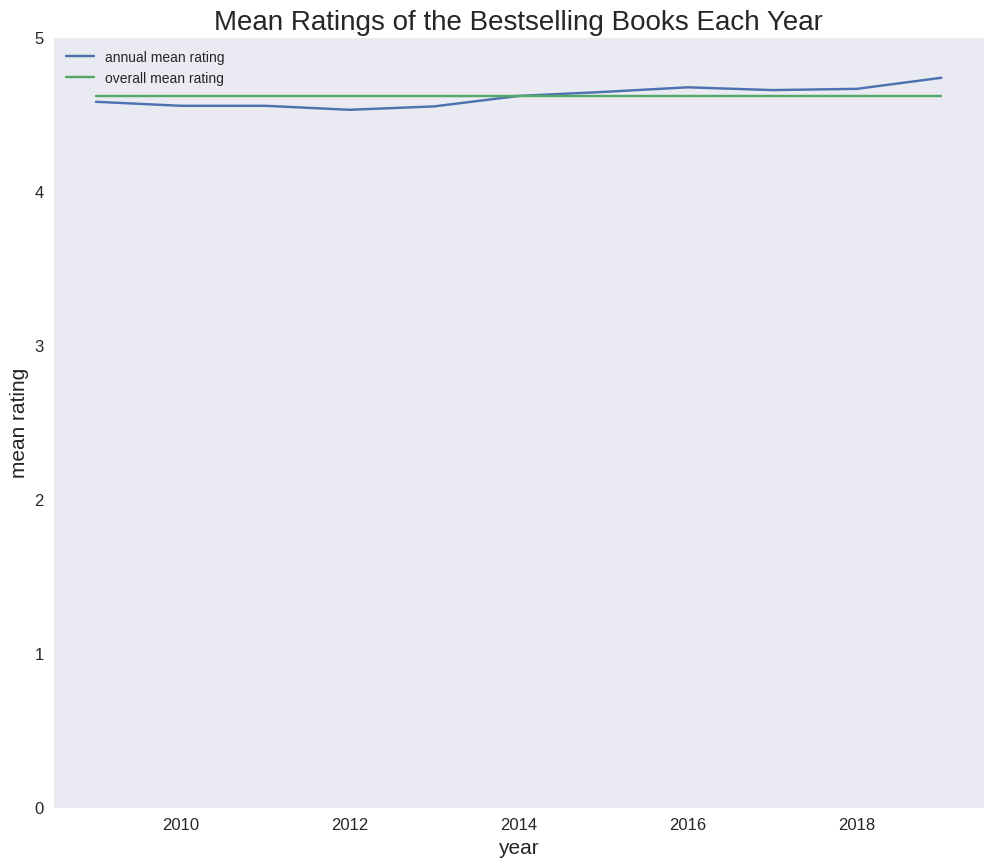

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(mean_rating_year,label='annual mean rating')
x=np.linspace(2009,2019,11)
y=x*0+ mean_rating_year['User Rating'].mean()
plt.plot(x,y,label='overall mean rating')
plt.ylim(0,5)
plt.xlabel('year', fontsize=15)
plt.ylabel('mean rating', fontsize=15)
plt.tick_params(axis='both', labelsize=12)
plt.title('Mean Ratings of the Bestselling Books Each Year',fontsize=20)
plt.legend()
plt.grid()
plt.show()

We can observe that the annual mean ratings are quite close, fluctuating between 4.5 and 4.8. Thus we could say that averagely, the quality of the bestselling books are guaranteed. Considering the highest rating is 4.9, let's see what the books with rating 4.9 are like

8. Are more of those highest-rated books fictional or non-fictional?

In [ ]:
Amazon_data.loc[Amazon_data['User Rating'] == 4.9]

,Name,Author,User Rating,Reviews,Price,Year,Genre
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2017,Fiction
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019,Fiction
81,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,4.9,5062,6,2018,Fiction
82,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,4.9,4786,8,2017,Fiction
83,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2018,Fiction
84,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2019,Fiction
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619,8,2019,Fiction
86,Dog Man: For Whom the Ball Rolls: From the Cre...,Dav Pilkey,4.9,9089,8,2019,Fiction
87,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,4.9,5470,6,2018,Fiction
146,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,4.9,7038,7,2012,Fiction


In [ ]:
highest_rating=Amazon_data[(Amazon_data['User Rating']==4.9)] # filtering
#drop duplicates
highest_rating=highest_rating.drop_duplicates(subset='Name',keep='first',inplace=False)
highest_rating.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2017,Fiction
81,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,4.9,5062,6,2018,Fiction
82,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,4.9,4786,8,2017,Fiction
83,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2018,Fiction
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619,8,2019,Fiction
86,Dog Man: For Whom the Ball Rolls: From the Cre...,Dav Pilkey,4.9,9089,8,2019,Fiction
87,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,4.9,5470,6,2018,Fiction
146,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,4.9,7038,7,2012,Fiction
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016,Non Fiction
153,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,4.9,19622,30,2016,Fiction


In [ ]:
Genre = highest_rating.groupby('Genre')[['Name']].count().sort_values('Name', ascending=False).head(11)
Genre.head()

,Name
Genre,
Fiction,22
Non Fiction,6


9.Percentages of Fiction and Non Fiction among books with the highest rating

<ipython-input-35-0c4105a321c1>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



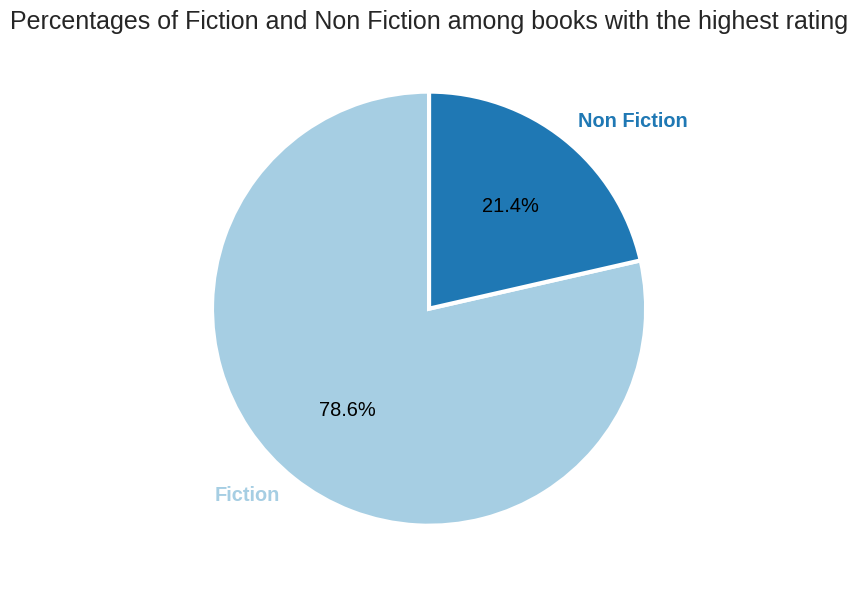

In [ ]:
plt.style.use("seaborn")
palette = sns.color_palette("Paired",2)
fig, ax = plt.subplots(figsize=(8, 6))
patches, texts, pcts = ax.pie(x=[22,6], labels=['Fiction','Non Fiction'],colors=palette ,autopct='%.1f%%',wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},textprops={'size': 'x-large'},startangle=90)
# For each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='black')
plt.setp(texts, fontweight=600)
ax.set_title('Percentages of Fiction and Non Fiction among books with the highest rating',fontsize=18)
plt.tight_layout()
plt.show()

10.Percentages of Fiction and Non Fiction among all the Bestselling Books

In [ ]:
# sample1 instead of df
Genre = sample1.groupby('Genre')[['Name']].count().sort_values('Name', ascending=False).head(11)
Genre.head()

,Name
Genre,
Non Fiction,190
Fiction,159


<ipython-input-37-1c515f928b6c>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



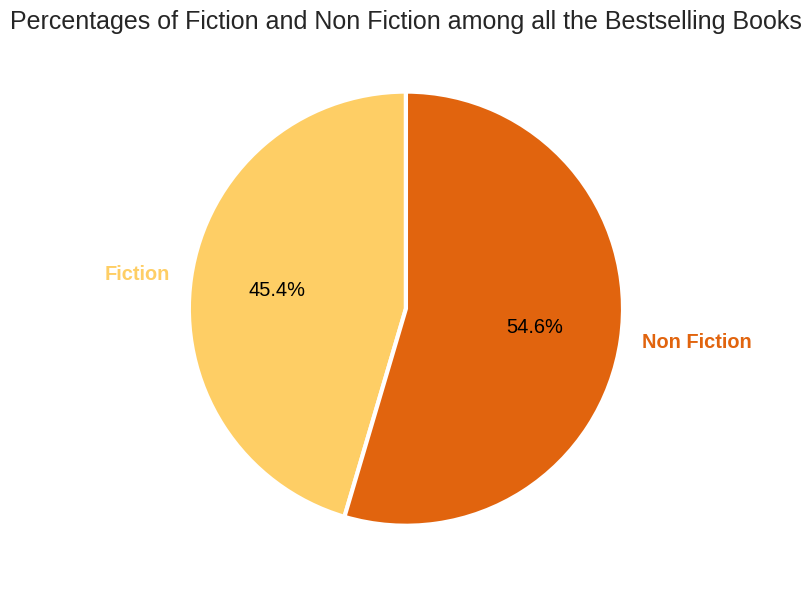

In [ ]:
plt.style.use("seaborn")
palette = sns.color_palette("YlOrBr",2)
fig, ax = plt.subplots(figsize=(8, 6))
patches, texts, pcts = ax.pie(x=[159,191], labels=['Fiction','Non Fiction'],colors=palette ,autopct='%.1f%%',wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},textprops={'size': 'x-large'},startangle=90)
# For each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='black')
plt.setp(texts, fontweight=600)
ax.set_title('Percentages of Fiction and Non Fiction among all the Bestselling Books',fontsize=18)
plt.tight_layout()
plt.show()

While there are more than three quarters fictional books among the highest rated books, the overall percentage of fiction is less than a half.

Though fictional books are less than non fictional books, they have received much more reviews from readers on Amazon, implying the popularity among readers as well as readers' preference.

In [ ]:
num_reviews = sample1.groupby('Genre')[['User Rating']].mean().sort_values('User Rating', ascending=False).head(15).reset_index()
num_reviews.head(15)

,Genre,User Rating
0,Fiction,4.615094
1,Non Fiction,4.602105


11.What is the correlation between price and rating?

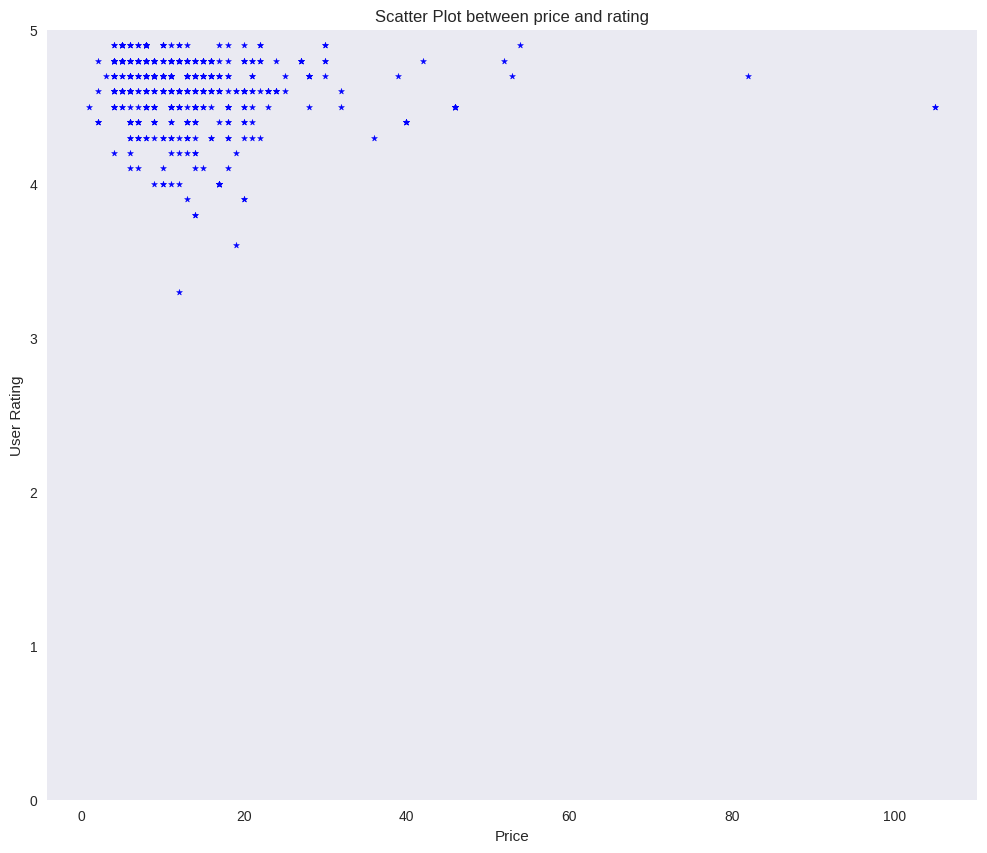

In [ ]:
sample_drop0price.plot.scatter(x='Price', y='User Rating', color='blue',marker='*',s=20,figsize=(12,10))
plt.ylim(0,5)
plt.title('Scatter Plot between price and rating')
plt.grid()

clustered in the upper left corner----nonlinear relationship, and not highly-correlated implying that books won't become more expensive just because of higher ratings. or be devaluated due to poor ratings

12.What is the correlation between rating and number of reviews?

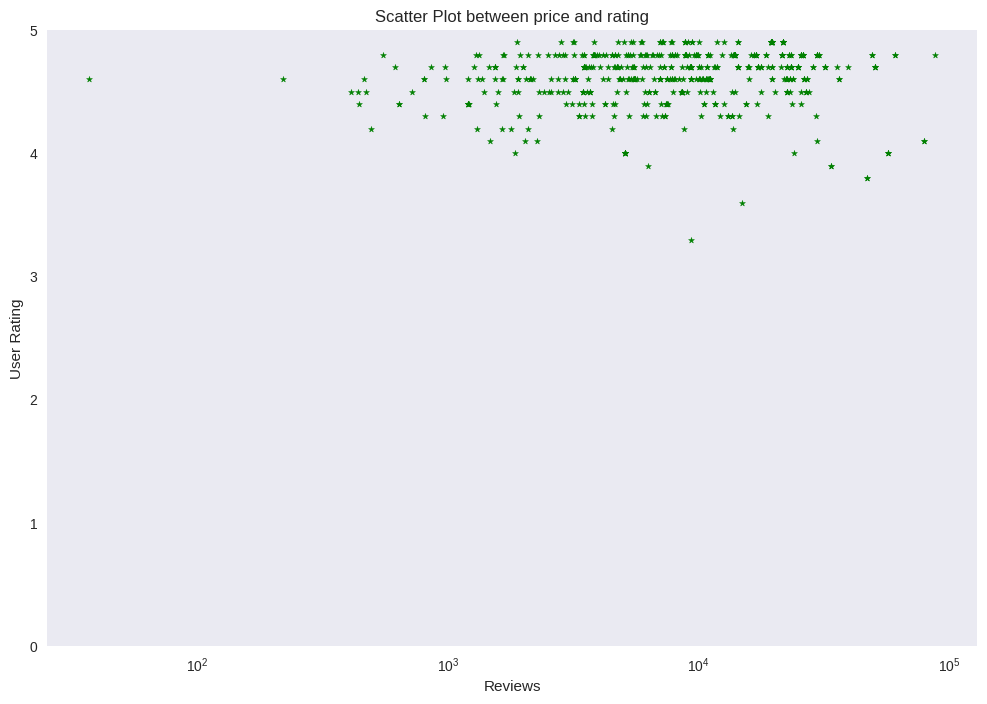

In [ ]:
Amazon_data.plot.scatter(x='Reviews', y='User Rating',logx=True, color='green',marker='*',s=20,figsize=(12,8))
plt.ylim(0,5)
plt.title('Scatter Plot between price and rating')
plt.grid()

Also, nonlinear relationship, and not highly-correlated We could interpret that large number of reviews won't make a difference to book ratings.

In [ ]:
top_20_reviews = Amazon_data.sort_values('Reviews', ascending=False)[:20]
top_20_reviews

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,2016,Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
137,Gone Girl,Gillian Flynn,4.0,57271,9,2014,Fiction
135,Gone Girl,Gillian Flynn,4.0,57271,10,2012,Fiction
136,Gone Girl,Gillian Flynn,4.0,57271,10,2013,Fiction
368,The Fault in Our Stars,John Green,4.7,50482,13,2014,Fiction
367,The Fault in Our Stars,John Green,4.7,50482,7,2014,Fiction


# Correlation Between the Features

<Axes: >

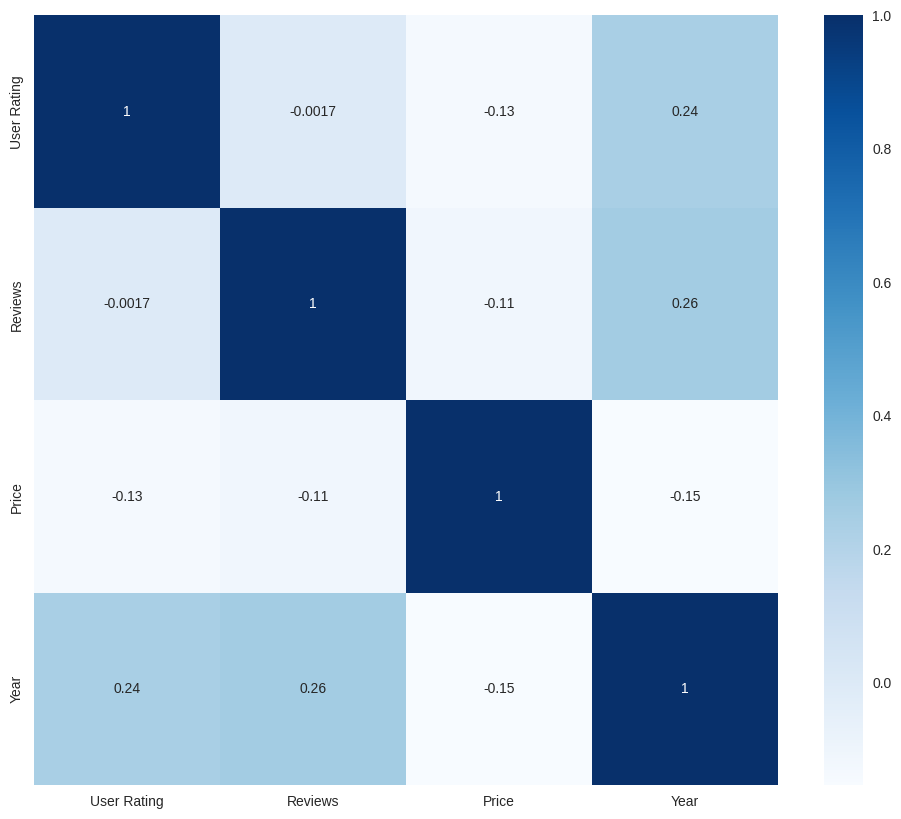

In [ ]:
#Seeing the correlation for each feature using the heatmap
fig, ax = plt.subplots(figsize=(12,10))
fig.patch.set_facecolor('white')
sns.heatmap(Amazon_data.corr(), ax=ax, annot=True, cmap="Blues")

# Feature Engineering

In [ ]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

In [ ]:
#Applying the label encoder on features
Amazon_data['Genre'] = label_encoder.fit_transform(Amazon_data['Genre'])
Amazon_data['Author'] = label_encoder.fit_transform(Amazon_data['Author'])

In [ ]:
Amazon_data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,111,4.7,17350,8,2016,1
1,11/22/63: A Novel,217,4.6,2052,22,2011,0
2,12 Rules for Life: An Antidote to Chaos,132,4.7,18979,15,2018,1
3,1984 (Signet Classics),95,4.7,21424,6,2017,0
4,"5,000 Awesome Facts (About Everything!) (Natio...",172,4.8,7665,12,2019,1


# Spliting Data into Train and Test

In [ ]:
#Creating x and y
X = Amazon_data[['Author','User Rating', 'Reviews', 'Price', 'Year']]
y = Amazon_data['Genre'].values

In [ ]:
#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
#printing the shape of x_train,x_test,y_train,y_test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(440, 5)
(440,)
(110, 5)
(110,)


**Feature Scaling**

In [ ]:
#Creating the variable for Standardscaler object
scaler = StandardScaler()
#Fit the model
scaler.fit(X_train)
#Making the transform for x train and x test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

# Models

1. Logistic Regression

In [ ]:
#Sklearn for Logistic
from sklearn.linear_model import LogisticRegression

In [ ]:
#Initializing the SVC
LRclassifier =  LogisticRegression()
#Fit the x_train and y_train
LRclassifier.fit(X_train, y_train)
#Making the prediction on X_test
y_pred = LRclassifier.predict(X_test)
#Making the prediction on X_train
y_pred1 = LRclassifier.predict(X_train)

In [ ]:
#comparing actual response values (y_train with predicted response values (y_pred1)
LR_Train =  metrics.accuracy_score(y_train, y_pred1)*100
print("LR model accuracy(in %) for Training:",LR_Train)
#comparing actual response values (y_test) with predicted response values (y_pred)
LR_Test = metrics.accuracy_score(y_test, y_pred)*100
print("LR model accuracy(in %) for Testing:", LR_Test)

LR model accuracy(in %) for Training: 65.9090909090909
LR model accuracy(in %) for Testing: 67.27272727272727


In [ ]:
##Confusion Matrix is the number of correct and incorrect predictions made by a classifier
result0 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for LR:")
print(result0)
#Getting the classification report
result00 = classification_report(y_test, y_pred)
print("Classification Report for LR:",)
print (result00)
#Overall accuracy
result01 = accuracy_score(y_test,y_pred)
print("Overall Accuracy For LR:",result01)

Confusion Matrix for LR:
[[24 28]
 [ 8 50]]
Classification Report for LR:
              precision    recall  f1-score   support

           0       0.75      0.46      0.57        52
           1       0.64      0.86      0.74        58

    accuracy                           0.67       110
   macro avg       0.70      0.66      0.65       110
weighted avg       0.69      0.67      0.66       110

Overall Accuracy For LR: 0.6727272727272727


In [ ]:
#performance measure
LR_ACC = accuracy_score(y_test,y_pred)*100
print("Overall Accuracy For LR:",LR_ACC)
LR_Precision = precision_score(y_test, y_pred,average='macro')*100
print('Precision:',LR_Precision)
LR_Recall = recall_score(y_test, y_pred,average='macro')*100
print('Recall:',LR_Recall)
LR_F1 = f1_score(y_test, y_pred,average='macro')*100
print('F1 Score:',LR_F1)
FP = result0.sum(axis=0) - np.diag(result0) 
FN = result0.sum(axis=1) - np.diag(result0)
TP = np.diag(result0)
TN = result0.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
total=sum(sum(result0))
# Sensitivity, hit rate, recall, or true positive rate
LR_TPR = ((TP/(TP+FN))).mean()*100
# Specificity or true negative rate
LR_TNR = ((TN/(TN+FP))).mean()*100 

print('Sensitivity:' ,LR_TPR)
print('Specificity: ' ,LR_TNR)

Overall Accuracy For LR: 67.27272727272727
Precision: 69.55128205128204
Recall: 66.18037135278514
F1 Score: 65.3361344537815
Sensitivity: 66.18037135278514
Specificity:  66.18037135278514


2. Support Vector Machine

In [ ]:
#Sklearn for SVC
from sklearn.svm import SVC

In [ ]:
#Initializing the SVC
classifier =  SVC(kernel='rbf')
#Fit the x_train and y_train
classifier.fit(X_train, y_train)
#Making the prediction on X_test
y_pred = classifier.predict(X_test)
#Making the prediction on X_train
y_pred1 = classifier.predict(X_train)

In [ ]:
#comparing actual response values (y_train with predicted response values (y_pred1)
SVC_Train =  metrics.accuracy_score(y_train, y_pred1)*100
print("SVC model accuracy(in %) for Training:",SVC_Train)
#comparing actual response values (y_test) with predicted response values (y_pred)
SVC_Test = metrics.accuracy_score(y_test, y_pred)*100
print("SVC model accuracy(in %) for Testing:", SVC_Test)

SVC model accuracy(in %) for Training: 78.86363636363637
SVC model accuracy(in %) for Testing: 75.45454545454545


In [ ]:
##Confusion Matrix is the number of correct and incorrect predictions made by a classifier
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for SVC:")
print(result)
#Getting the classification report
result1 = classification_report(y_test, y_pred)
print("Classification Report for SVC:",)
print (result1)
#Overall accuracy
result2 = accuracy_score(y_test,y_pred)
print("Overall Accuracy For SVC:",result2)

Confusion Matrix for SVC:
[[31 21]
 [ 6 52]]
Classification Report for SVC:
              precision    recall  f1-score   support

           0       0.84      0.60      0.70        52
           1       0.71      0.90      0.79        58

    accuracy                           0.75       110
   macro avg       0.78      0.75      0.75       110
weighted avg       0.77      0.75      0.75       110

Overall Accuracy For SVC: 0.7545454545454545


In [ ]:
#performance measure
SVC_ACC = accuracy_score(y_test,y_pred)*100
print("Overall Accuracy For SVC:",SVC_ACC)
SVC_Precision = precision_score(y_test, y_pred,average='macro')*100
print('Precision:',SVC_Precision)
SVC_Recall = recall_score(y_test, y_pred,average='macro')*100
print('Recall:',SVC_Recall)
SVC_F1 = f1_score(y_test, y_pred,average='macro')*100
print('F1 Score:',SVC_F1)
FP = result.sum(axis=0) - np.diag(result) 
FN = result.sum(axis=1) - np.diag(result)
TP = np.diag(result)
TN = result.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
total=sum(sum(result))
# Sensitivity, hit rate, recall, or true positive rate
SVC_TPR = ((TP/(TP+FN))).mean()*100
# Specificity or true negative rate
SVC_TNR = ((TN/(TN+FP))).mean()*100 

print('Sensitivity:' ,SVC_TPR)
print('Specificity: ' ,SVC_TNR)

Overall Accuracy For SVC: 75.45454545454545
Precision: 77.50833024805628
Recall: 74.63527851458886
F1 Score: 74.52611716270692
Sensitivity: 74.63527851458886
Specificity:  74.63527851458886


3. KNN

In [ ]:
#Calling the KNeighborsClassifier (in-build function) using skelarn libray
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Initializing the MLPClassifier
KNNclassifier =  KNeighborsClassifier(n_neighbors = 5)
KNNclassifier.fit(X_train, y_train)
#Making the prediction on X_test
y_pred = KNNclassifier.predict(X_test)
#Making the prediction on X_train
y_pred1 = KNNclassifier.predict(X_train)

In [ ]:
#comparing actual response values (y_train with predicted response values (y_pred1)
KNN_Train =  metrics.accuracy_score(y_train, y_pred1)*100
print("KNN model accuracy(in %) for Training:",KNN_Train)
#comparing actual response values (y_test) with predicted response values (y_pred)
KNN_Test = metrics.accuracy_score(y_test, y_pred)*100
print("KNN model accuracy(in %) for Testing:", KNN_Test)

KNN model accuracy(in %) for Training: 81.81818181818183
KNN model accuracy(in %) for Testing: 73.63636363636363


In [ ]:
##Confusion Matrix is the number of correct and incorrect predictions made by a classifier
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for KNN:")
print(result)
#Getting the classification report
result1 = classification_report(y_test, y_pred)
print("Classification Report for KNN:",)
print (result1)
#Overall accuracy
result2 = accuracy_score(y_test,y_pred)
print("Overall Accuracy For KNN:",result2)

Confusion Matrix for KNN:
[[36 16]
 [13 45]]
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.73      0.69      0.71        52
           1       0.74      0.78      0.76        58

    accuracy                           0.74       110
   macro avg       0.74      0.73      0.73       110
weighted avg       0.74      0.74      0.74       110

Overall Accuracy For KNN: 0.7363636363636363


In [ ]:
#performance measure
KNN_ACC = accuracy_score(y_test,y_pred)*100
print("Overall Accuracy For KNN:",KNN_ACC)
KNN_Precision = precision_score(y_test, y_pred,average='macro')*100
print('Precision:',KNN_Precision)
KNN_Recall = recall_score(y_test, y_pred,average='macro')*100
print('Recall:',KNN_Recall)
KNN_F1 = f1_score(y_test, y_pred,average='macro')*100
print('F1 Score:',KNN_F1)
FP = result.sum(axis=0) - np.diag(result) 
FN = result.sum(axis=1) - np.diag(result)
TP = np.diag(result)
TN = result.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
total=sum(sum(result))
# Sensitivity, hit rate, recall, or true positive rate
KNN_TPR = ((TP/(TP+FN))).mean()*100
# Specificity or true negative rate
KNN_TNR = ((TN/(TN+FP))).mean()*100 

print('Sensitivity:' ,KNN_TPR)
print('Specificity: ' ,KNN_TNR)

Overall Accuracy For KNN: 73.63636363636363
Precision: 73.61993977919037
Recall: 73.40848806366047
F1 Score: 73.45869040685581
Sensitivity: 73.40848806366047
Specificity:  73.40848806366047


4. Decision Tree

In [ ]:
#Fitting Decision Tree classifier to the training set  and testing set
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DTclassifier = DecisionTreeClassifier(max_leaf_nodes = 50)
DTclassifier.fit(X_train, y_train)
#Making the prediction on X_test
y_pred = DTclassifier.predict(X_test)
#Making the prediction on X_train
y_pred1 = DTclassifier.predict(X_train)
#comparing actual response values (y_train with predicted response values (y_pred1)
DT_Train =  metrics.accuracy_score(y_train, y_pred1)*100
print("Decision Tree model accuracy(in %) for Training:",DT_Train)
#comparing actual response values (y_test) with predicted response values (y_pred)
DT_Test = metrics.accuracy_score(y_test, y_pred)*100
print("Decision Tree model accuracy(in %) for Testing:", DT_Test)

Decision Tree model accuracy(in %) for Training: 93.86363636363636
Decision Tree model accuracy(in %) for Testing: 82.72727272727273


In [ ]:
##Confusion Matrix is the number of correct and incorrect predictions made by a classifier
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for DT:")
print(result)
#Getting the classification report
result1 = classification_report(y_test, y_pred)
print("Classification Report for DT:",)
print (result1)
#Overall accuracy
result2 = accuracy_score(y_test,y_pred)
print("Overall Accuracy For DT:",result2)

Confusion Matrix for DT:
[[38 14]
 [ 5 53]]
Classification Report for DT:
              precision    recall  f1-score   support

           0       0.88      0.73      0.80        52
           1       0.79      0.91      0.85        58

    accuracy                           0.83       110
   macro avg       0.84      0.82      0.82       110
weighted avg       0.83      0.83      0.83       110

Overall Accuracy For DT: 0.8272727272727273


In [ ]:
#performance measure
DT_ACC = accuracy_score(y_test,y_pred)*100
print("Overall Accuracy For DT:",DT_ACC)
DT_Precision = precision_score(y_test, y_pred,average='macro')*100
print('Precision:',DT_Precision)
DT_Recall = recall_score(y_test, y_pred,average='macro')*100
print('Recall:',DT_Recall)
DT_F1 = f1_score(y_test, y_pred,average='macro')*100
print('F1 Score:',DT_F1)

Overall Accuracy For DT: 82.72727272727273
Precision: 83.73828531759806
Recall: 82.22811671087533
F1 Score: 82.4


In [ ]:
FP = result.sum(axis=0) - np.diag(result) 
FN = result.sum(axis=1) - np.diag(result)
TP = np.diag(result)
TN = result.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
total=sum(sum(result))
# Sensitivity, hit rate, recall, or true positive rate
DT_TPR = ((TP/(TP+FN))).mean()*100
# Specificity or true negative rate
DT_TNR = ((TN/(TN+FP))).mean()*100 

print('Sensitivity:' ,DT_TPR)
print('Specificity: ' ,DT_TNR)

Sensitivity: 82.22811671087533
Specificity:  82.22811671087533


5. Random Forest

In [ ]:
#Fitting Random Forest to the training set and testing set
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RFclassifier = RandomForestClassifier(n_estimators = 20, random_state = 0)
RFclassifier.fit(X_train, y_train)
#Making the prediction on X_test
y_pred = RFclassifier.predict(X_test)
#Making the prediction on X_train
y_pred1 = RFclassifier.predict(X_train)
#comparing actual response values (y_train with predicted response values (y_pred1)
RF_Train =  metrics.accuracy_score(y_train, y_pred1)*100
print("Random Forest model accuracy(in %) for Training:",RF_Train)
#comparing actual response values (y_test) with predicted response values (y_pred)
RF_Test = metrics.accuracy_score(y_test, y_pred)*100
print("Random Forest model accuracy(in %) for Testing:", RF_Test)

Random Forest model accuracy(in %) for Training: 100.0
Random Forest model accuracy(in %) for Testing: 86.36363636363636


In [ ]:
#performance measure
RF_ACC = accuracy_score(y_test,y_pred)*100
print("Overall Accuracy For RF:",RF_ACC)
RF_Precision = precision_score(y_test, y_pred,average='macro')*100
print('Precision:',RF_Precision)
RF_Recall = recall_score(y_test, y_pred,average='macro')*100
print('Recall:',RF_Recall)
RF_F1 = f1_score(y_test, y_pred,average='macro')*100
print('F1 Score:',RF_F1)

##Confusion Matrix is the number of correct and incorrect predictions made by a classifier
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for RF:")
print(result)
#Getting the classification report
result1 = classification_report(y_test, y_pred)
print("Classification Report for RF:",)
print (result1)
#Overall accuracy
result2 = accuracy_score(y_test,y_pred)
print("Overall Accuracy For RF:",result2)

Overall Accuracy For RF: 86.36363636363636
Precision: 87.55640402637972
Recall: 85.87533156498675
F1 Score: 86.10526315789473
Confusion Matrix for RF:
[[40 12]
 [ 3 55]]
Classification Report for RF:
              precision    recall  f1-score   support

           0       0.93      0.77      0.84        52
           1       0.82      0.95      0.88        58

    accuracy                           0.86       110
   macro avg       0.88      0.86      0.86       110
weighted avg       0.87      0.86      0.86       110

Overall Accuracy For RF: 0.8636363636363636


In [ ]:
FP = result.sum(axis=0) - np.diag(result) 
FN = result.sum(axis=1) - np.diag(result)
TP = np.diag(result)
TN = result.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
total=sum(sum(result))
# Sensitivity, hit rate, recall, or true positive rate
RF_TPR = ((TP/(TP+FN))).mean()*100
# Specificity or true negative rate
RF_TNR = ((TN/(TN+FP))).mean()*100 

print('Sensitivity:' ,RF_TPR)
print('Specificity: ' ,RF_TNR)

Sensitivity: 85.87533156498675
Specificity:  85.87533156498675


In [ ]:
DataTable = {'Logistic Regression' : [LR_Train,LR_Test,LR_Precision,LR_Recall,LR_F1,LR_TPR,LR_TPR],
              'Support Vector Machine':[SVC_Train,SVC_Test,SVC_Precision,SVC_Recall,SVC_F1,SVC_TPR,SVC_TPR],
             'KNN':[KNN_Train,KNN_Test,KNN_Precision,KNN_Recall,KNN_F1,KNN_TPR,KNN_TPR],
             'Decision Tree':[DT_Train,DT_Test,DT_Precision,DT_Recall,DT_F1,DT_TPR,DT_TPR],
             'Random Forest':[RF_Train,RF_Test,RF_Precision,RF_Recall,RF_F1,RF_TPR,RF_TPR]}
# Creates pandas DataFrame.  
pd.DataFrame(DataTable, index =['Training Accuracy','Testing Accuracy', 'Percision', 'Recall','F1 score', 'Sensitivity','Specificity',])  

,Logistic Regression,Support Vector Machine,KNN,Decision Tree,Random Forest
Training Accuracy,65.909091,78.863636,81.818182,93.863636,100.000000
Testing Accuracy,67.272727,75.454545,73.636364,82.727273,86.363636
Percision,69.551282,77.508330,73.619940,83.738285,87.556404
Recall,66.180371,74.635279,73.408488,82.228117,85.875332
F1 score,65.336134,74.526117,73.458690,82.400000,86.105263
Sensitivity,66.180371,74.635279,73.408488,82.228117,85.875332
Specificity,66.180371,74.635279,73.408488,82.228117,85.875332
